# Data Cleaning and Feature Engineering

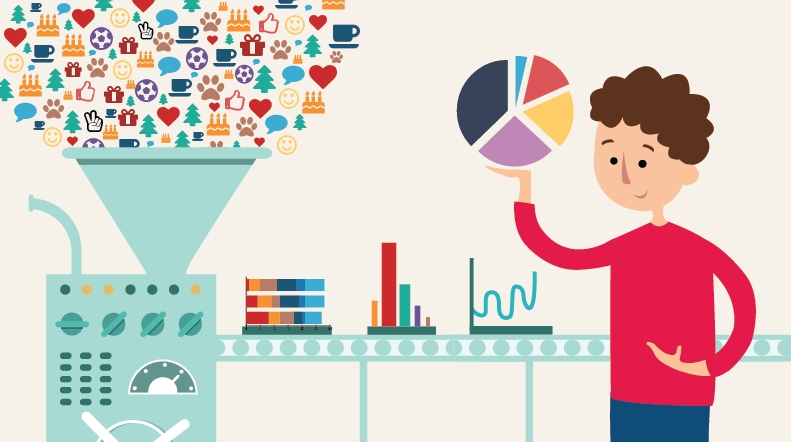

## Imports 

In [87]:
import pandas as pd
import numpy as np


Import the house data

In [88]:
df = pd.read_csv('./data/kc_house_data.csv', parse_dates = ['date'])

In [89]:
house = df.copy()

## Data Understanding

In [90]:
house.shape

(21597, 21)

In [91]:
house['date'].min(), house['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [92]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [93]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

## Data Cleaning

We drop the ID and date column as they are not of much use

- The house prices are only for a period of one year
- house ID are unique keys only

In [94]:
# Dropping the id and date column
house = house.drop(['id', 'date'], axis=1)

In [95]:
house['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [96]:
# splitting grade and keeping only the numerical value of the grade
house['grade'] = house['grade'].map(lambda x: x.split()[0])

In [97]:
house['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [98]:
house['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [99]:
house['waterfront'].isnull().sum()

2376

Null values for waterfront feature accounts for ~10% of our data and ~99% of the remaining houses don't have waterfront view. We believe waterfront houses usually have higher prices and waterfront would be a key feature in the model. 

After further investigation, we find that the waterfront predictor is not classified well. Some houses classified as waterfront houses are located in front of a puddle which is should not affect the house prices grately. Also most houses which are waterfront are not classfied well. Please refer to [Blog explaining the waterfront predictor in this data](https://towardsdatascience.com/a-beginners-guide-to-feature-engineering-with-qgis-6147ffaba2eb)

We decided to drop the feature.

In [100]:
# dropping waterfront feature
house = house.drop(['waterfront'], axis=1)

In [101]:
# checking null values for view feature
house['view'].isnull().sum()

63

In [102]:
house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

"View" feature has 63 null values which accounts for a very small percentage of the whole data set so we decide to drop the null values

In [103]:
# dropping 63 records with null view values
house = house.dropna(subset=['view'])

In [104]:
house['condition'].value_counts() # no null values

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64

In [105]:
house['yr_renovated'].value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [106]:
house['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

"yr renovated" feature - 
- with only 17704 non null values (82%)
- out of the non-null values, 16961 (96% of non-nulls) have "0" value. 
- Essentially , almost 79% of the values are not giving us any information. 

We decide to drop the "yr renovated" column.

In [107]:
# dropping yr renovated column 
house = house.drop(['yr_renovated'], axis=1)

In [108]:
house.info() #objects - View, condition and sqft_basement
# leave as string and change later using OHE - view, condition

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   view           21534 non-null  object 
 7   condition      21534 non-null  object 
 8   grade          21534 non-null  object 
 9   sqft_above     21534 non-null  int64  
 10  sqft_basement  21534 non-null  object 
 11  yr_built       21534 non-null  int64  
 12  zipcode        21534 non-null  int64  
 13  lat            21534 non-null  float64
 14  long           21534 non-null  float64
 15  sqft_living15  21534 non-null  int64  
 16  sqft_lot15     21534 non-null  int64  
dtypes: float64(5), int64(8), object(4)
memory usage: 3

In [109]:
house['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [110]:
house.loc[house['sqft_basement'] == '?'] 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7,1715,?,1995,98003,47.3097,-122.327,2238,6819
18,189000.0,2,1.00,1200,9850,1.0,NONE,Good,7,1200,?,1921,98002,47.3089,-122.210,1060,5095
42,861990.0,5,2.75,3595,5639,2.0,NONE,Average,9,3595,?,2014,98053,47.6848,-122.016,3625,5639
79,720000.0,4,2.50,3450,39683,2.0,NONE,Average,10,3450,?,2002,98010,47.3420,-122.025,3350,39750
112,272500.0,3,1.75,1540,12600,1.0,NONE,Good,7,1160,?,1980,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,504600.0,5,3.00,2360,5000,1.0,NONE,Average,7,1390,?,2008,98103,47.6931,-122.330,2180,5009
21447,337500.0,4,2.50,2330,4907,2.0,NONE,Average,7,2330,?,2013,98042,47.3590,-122.081,2300,3836
21473,352500.0,2,2.50,980,1010,3.0,NONE,Average,8,980,?,2008,98117,47.6844,-122.387,980,1023
21519,332000.0,4,2.50,2380,5737,2.0,NONE,Average,7,2380,?,2010,98023,47.2815,-122.356,2380,5396


For feature "sqft_basement" we notice "?" values for 452 entries. We decide to drop the feature itself as we feel sqft_above is better and cleaner feature. 

Note:
sqft_living = sqft_above + sqft_basement

In [111]:
house = house.drop(['sqft_basement'], axis=1)

In [112]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   view           21534 non-null  object 
 7   condition      21534 non-null  object 
 8   grade          21534 non-null  object 
 9   sqft_above     21534 non-null  int64  
 10  yr_built       21534 non-null  int64  
 11  zipcode        21534 non-null  int64  
 12  lat            21534 non-null  float64
 13  long           21534 non-null  float64
 14  sqft_living15  21534 non-null  int64  
 15  sqft_lot15     21534 non-null  int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 2.8+ MB


## Adding population data

In [113]:
popdf = pd.read_csv('./data/popdata.csv')

In [114]:
areadf = pd.read_csv('./data/KC_area.csv',header=1)

In [115]:
areadf.drop(areadf.columns[0],axis= 1,inplace=True)

In [116]:
king_pop = popdf[popdf["county"]=='King']

king_area = areadf[areadf["County"]=="King County"]

pd.concat([popdf, areadf], axis=1, join="inner")

,zip,city,county,pop,ZIP Code,City,County,Land Area (Sq. Meters),Land Area (Sq. Miles),Land Area (Sq. Kilometers)
0,99301,Pasco,Franklin,79819,98001,"Algona, Auburn, Federal Way, Lakeland North, L...",King County,"48,144,700",19,48
1,98052,Redmond,King,70245,98002,"Auburn, Pacific",King County,"18,530,000",7,19
2,98012,Bothell,Snohomish,67427,98003,"Federal Way, Lakeland South, Milton",King County,"30,089,500",12,30
3,98682,Vancouver,Clark,60887,98004,"Beaux Arts Village, Bellevue, Clyde Hill, Hunt...",King County,"18,200,300",7,18
4,98208,Everett,Snohomish,58162,98005,Bellevue,King County,"19,429,600",8,19
...,...,...,...,...,...,...,...,...,...,...
517,99124,Elmer City,Okanogan,271,99362,"College Place, Garrett, Walla Walla, Walla Wal...","Umatilla County, Walla Walla County","740,792,000",286,741
518,98621,Grays River,Wahkiakum,269,99363,Wallula,Walla Walla County,"115,344,000",45,115
519,98628,Klickitat,Klickitat,263,99371,Washtucna,"Adams County, Franklin County","527,778,000",204,528
520,99322,Bickleton,Klickitat,242,99402,Asotin,Asotin County,"741,921,000",286,742


In [117]:
king_pop = popdf[popdf["county"]=='King']

king_area = areadf[areadf["County"]=="King County"]

pd.concat([popdf, areadf], axis=1, join="inner")

,zip,city,county,pop,ZIP Code,City,County,Land Area (Sq. Meters),Land Area (Sq. Miles),Land Area (Sq. Kilometers)
0,99301,Pasco,Franklin,79819,98001,"Algona, Auburn, Federal Way, Lakeland North, L...",King County,"48,144,700",19,48
1,98052,Redmond,King,70245,98002,"Auburn, Pacific",King County,"18,530,000",7,19
2,98012,Bothell,Snohomish,67427,98003,"Federal Way, Lakeland South, Milton",King County,"30,089,500",12,30
3,98682,Vancouver,Clark,60887,98004,"Beaux Arts Village, Bellevue, Clyde Hill, Hunt...",King County,"18,200,300",7,18
4,98208,Everett,Snohomish,58162,98005,Bellevue,King County,"19,429,600",8,19
...,...,...,...,...,...,...,...,...,...,...
517,99124,Elmer City,Okanogan,271,99362,"College Place, Garrett, Walla Walla, Walla Wal...","Umatilla County, Walla Walla County","740,792,000",286,741
518,98621,Grays River,Wahkiakum,269,99363,Wallula,Walla Walla County,"115,344,000",45,115
519,98628,Klickitat,Klickitat,263,99371,Washtucna,"Adams County, Franklin County","527,778,000",204,528
520,99322,Bickleton,Klickitat,242,99402,Asotin,Asotin County,"741,921,000",286,742


In [118]:
king_data = pd.merge(
    king_area,
    king_pop,
    how="inner",
    on=None,
    left_on="ZIP Code",
    right_on='zip',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [119]:
king_data_compact =king_data.drop(columns=['City','County','Land Area (Sq. Miles)','Land Area (Sq. Kilometers)','zip'])

king_data_compact.head()

,ZIP Code,Land Area (Sq. Meters),city,county,pop
0,98001,"48,144,700",Auburn,King,33699
1,98002,"18,530,000",Auburn,King,33468
2,98003,"30,089,500",Federal Way,King,49533
3,98004,"18,200,300",Bellevue,King,36202
4,98005,"19,429,600",Bellevue,King,19223


In [120]:
def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds

In [121]:
remove_chars(king_data_compact["Land Area (Sq. Meters)"],',')

<ipython-input-120-968c3d56aa1e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[idx] = row.replace(char,"")


0      48144700
1      18530000
2      30089500
3      18200300
4      19429600
        ...    
73       183452
74     20167200
75     10815400
76    510454000
77    547876000
Name: Land Area (Sq. Meters), Length: 78, dtype: object

In [122]:
king_data_compact['Land Area (Sq. Meters)']= king_data_compact['Land Area (Sq. Meters)'].astype(int)

In [123]:
king_data_compact['density'] = king_data_compact['pop'] / king_data_compact['Land Area (Sq. Meters)']

In [124]:
merged_king_data = pd.merge(
    house,
    king_data_compact,
    how="inner",
    on=None,
    left_on="zipcode",
    right_on='ZIP Code',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [125]:
merged_king_data['zipcode']== merged_king_data["ZIP Code"]

0        True
1        True
2        True
3        True
4        True
         ... 
20223    True
20224    True
20225    True
20226    True
20227    True
Length: 20228, dtype: bool

In [126]:
merged_king_data.drop(columns=['ZIP Code','county'], inplace=True)

merged_king_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20227
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   20228 non-null  float64
 1   bedrooms                20228 non-null  int64  
 2   bathrooms               20228 non-null  float64
 3   sqft_living             20228 non-null  int64  
 4   sqft_lot                20228 non-null  int64  
 5   floors                  20228 non-null  float64
 6   view                    20228 non-null  object 
 7   condition               20228 non-null  object 
 8   grade                   20228 non-null  object 
 9   sqft_above              20228 non-null  int64  
 10  yr_built                20228 non-null  int64  
 11  zipcode                 20228 non-null  int64  
 12  lat                     20228 non-null  float64
 13  long                    20228 non-null  float64
 14  sqft_living15           20228 non-null

In [127]:
merged_king_data['grade']= merged_king_data['grade'].astype(object)

merged_king_data.drop(columns=['density','pop','Land Area (Sq. Meters)','lat','long', 'zipcode'],inplace=True)

merged_king_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20227
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20228 non-null  float64
 1   bedrooms       20228 non-null  int64  
 2   bathrooms      20228 non-null  float64
 3   sqft_living    20228 non-null  int64  
 4   sqft_lot       20228 non-null  int64  
 5   floors         20228 non-null  float64
 6   view           20228 non-null  object 
 7   condition      20228 non-null  object 
 8   grade          20228 non-null  object 
 9   sqft_above     20228 non-null  int64  
 10  yr_built       20228 non-null  int64  
 11  sqft_living15  20228 non-null  int64  
 12  sqft_lot15     20228 non-null  int64  
 13  city           20228 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 2.3+ MB


In [128]:
merged_king_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20227
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20228 non-null  float64
 1   bedrooms       20228 non-null  int64  
 2   bathrooms      20228 non-null  float64
 3   sqft_living    20228 non-null  int64  
 4   sqft_lot       20228 non-null  int64  
 5   floors         20228 non-null  float64
 6   view           20228 non-null  object 
 7   condition      20228 non-null  object 
 8   grade          20228 non-null  object 
 9   sqft_above     20228 non-null  int64  
 10  yr_built       20228 non-null  int64  
 11  sqft_living15  20228 non-null  int64  
 12  sqft_lot15     20228 non-null  int64  
 13  city           20228 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 2.3+ MB


In [129]:
merged_king_data.to_csv('data/cleandata.csv')